In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import torch
import torchvision
from torch import nn, optim
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import SubsetRandomSampler

In [18]:
import os

In [19]:
import cv2

In [20]:
os.listdir('Data/Dog_cat_data/')

['train']

In [21]:
root = 'Data/Dog_cat_data/'

In [22]:
os.listdir('dogs-vs-cats/')

['sampleSubmission.csv', 'test1', 'test1.zip', 'train', 'train.zip']

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [24]:
img = cv2.imread('Data/Dog_cat_data/train/cat/cat.0.jpg')

In [25]:
img.shape

(374, 500, 3)

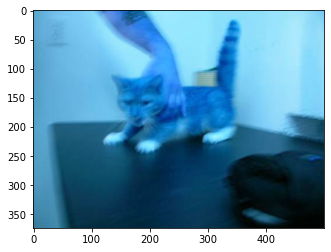

In [26]:
plt.imshow(img)

In [27]:
transform = transforms.Compose([transforms.Resize((224,224)),
                               transforms.ToTensor()])

In [28]:
# define dataloader parameters
batch_size = 8
num_workers=0

In [29]:
valid_ratio = 0.2

trainset = datasets.ImageFolder(root+'train',transform=transform)

num_train = len(trainset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_ratio*num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# Data samplers for train and validation sets
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(trainset, sampler=train_sampler, batch_size=batch_size,shuffle=False)
valid_loader = torch.utils.data.DataLoader(trainset, sampler=valid_sampler, batch_size=batch_size, shuffle=False)

In [30]:
classes = trainset.classes

In [31]:
dataiter = iter(train_loader)

In [32]:
img, label = dataiter.next()

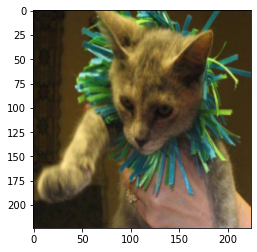

In [33]:
plt.imshow(np.transpose(img[0],(1,2,0)))

In [34]:
model = models.resnet34(pretrained=True)

In [35]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [36]:
model.fc = torch.nn.Sequential(nn.Linear(512,256),
                               nn.ReLU(),
                               nn.Linear(256,2),
                               nn.LogSoftmax(dim=1))

In [37]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [38]:
criterion = nn.NLLLoss()

In [39]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [40]:
from tqdm import tqdm

In [41]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [42]:
# number of epochs to train the model
n_epochs = 2

for epoch in range(1, n_epochs+1):
    print(f'Starting epoch {epoch}')
    # keep track of training and validation loss
    train_loss = 0.0
    
    for batch_i, (data, target) in tqdm(enumerate(train_loader)):
        
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)

        loss = criterion(output, target)
        loss.backward()
        
        optimizer.step()
        # update training loss 
        train_loss += loss.item()
        
        if batch_i % 20 == 19:    # print training loss every specified number of mini-batches
            print('Epoch %d, Batch %d loss: %.16f' %
                  (epoch, batch_i + 1, train_loss / 20))
            train_loss = 0.0

0it [00:00, ?it/s]

Starting epoch 1


21it [00:08,  7.84it/s]

Epoch 1, Batch 20 loss: 0.7152877971529961


41it [00:10,  8.40it/s]

Epoch 1, Batch 40 loss: 0.6002829745411873


61it [00:13,  7.40it/s]

Epoch 1, Batch 60 loss: 0.5880140677094460


77it [00:15,  5.11it/s]


KeyboardInterrupt: 